<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/NLP-Projects/blob/main/Text-Representation-Analyzer(BoW%20Vs%20TF-IDF)/Text_Representation_Analyzer_BoW_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Basic Setup

In [4]:
"""
TF-IDF and BoW Exploration Project

This script implements TF-IDF with various configurations (with/without stopwords, N-Grams)
and compares it with Bag of Words (BoW) on a small text corpus. It includes visualization
and result storage for detailed analysis.

"""

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import logging
from typing import List, Dict, Optional
import matplotlib.pyplot as plt
import seaborn as sns

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [1]:
# Set Warning Level
import warnings
warnings.filterwarnings('ignore')

# Text Representation Class

In [5]:
class TextRepresentationAnalyzer:
    """A class to analyze and compare TF-IDF and BoW representations."""

    def __init__(self, corpus: List[str]):
        """
        Initialize with a text corpus.

        Args:
            corpus (List[str]): List of text documents.
        """
        if not corpus or not all(isinstance(doc, str) for doc in corpus):
            raise ValueError("Corpus must be a non-empty list of strings")
        self.corpus = corpus
        self.results = {}

    def apply_tfidf(self, stop_words: Optional[str] = None, ngram_range: tuple = (1, 1)) -> Dict[str, np.ndarray]:
        """
        Apply TF-IDF with specified parameters.

        Args:
            stop_words (str, optional): Language for stopword removal (e.g., 'english').
            ngram_range (tuple): Range of n-grams (e.g., (1, 2) for unigrams and bigrams).

        Returns:
            Dict[str, np.ndarray]: Vocabulary and TF-IDF matrix.
        """
        try:
            vectorizer = TfidfVectorizer(
                stop_words=stop_words,
                ngram_range=ngram_range
            )
            tfidf_matrix = vectorizer.fit_transform(self.corpus)
            result = {
                'vocabulary': vectorizer.get_feature_names_out(),
                'matrix': tfidf_matrix.toarray()
            }
            logger.info(f"TF-IDF applied: stop_words={stop_words}, ngram_range={ngram_range}")
            return result
        except Exception as e:
            logger.error(f"Error in applying TF-IDF: {e}")
            return {'vocabulary': np.array([]), 'matrix': np.array([])}

    def apply_bow(self) -> Dict[str, np.ndarray]:
        """
        Apply Bag of Words (BoW) with simple counting.

        Returns:
            Dict[str, np.ndarray]: Vocabulary and BoW matrix.
        """
        try:
            vectorizer = CountVectorizer()
            bow_matrix = vectorizer.fit_transform(self.corpus)
            result = {
                'vocabulary': vectorizer.get_feature_names_out(),
                'matrix': bow_matrix.toarray()
            }
            logger.info("BoW applied with simple counting")
            return result
        except Exception as e:
            logger.error(f"Error in applying BoW: {e}")
            return {'vocabulary': np.array([]), 'matrix': np.array([])}

    def run_experiments(self) -> None:
        """Run all experiments and store results."""
        # TF-IDF Simple
        self.results['tfidf_simple'] = self.apply_tfidf()
        # without Stopwords
        self.results['tfidf_no_stopwords'] = self.apply_tfidf(stop_words='english')
        # with N-Grams (unigrams and bigrams)
        self.results['tfidf_ngrams'] = self.apply_tfidf(ngram_range=(1, 2))
        # BoW for comparison
        self.results['bow'] = self.apply_bow()

    def display_results(self) -> None:
        """Display matrices as DataFrames."""
        for method, result in self.results.items():
            if result['vocabulary'].size == 0:
                logger.warning(f"No results for {method}")
                continue
            df = pd.DataFrame(
                result['matrix'],
                columns=result['vocabulary'],
                index=[f"Doc {i+1}" for i in range(len(self.corpus))]
            )
            print(f"\n{method.replace('_', ' ').title()} Matrix:")
            print(df.round(3).to_string())  # گرد کردن برای خوانایی
            logger.info(f"Displayed {method} matrix with vocab size: {len(result['vocabulary'])}")

    def compare_sparsity_and_vocab_size(self) -> None:
        """Compare sparsity and vocabulary size across methods and visualize."""
        comparison_data = {'Method': [], 'Sparsity': [], 'Vocab Size': []}

        for method, result in self.results.items():
            if result['matrix'].size == 0:
                continue
            total_elements = result['matrix'].size
            non_zero_elements = np.count_nonzero(result['matrix'])
            sparsity = 1 - (non_zero_elements / total_elements)
            vocab_size = len(result['vocabulary'])

            comparison_data['Method'].append(method)
            comparison_data['Sparsity'].append(sparsity)
            comparison_data['Vocab Size'].append(vocab_size)

        # Convert to DataFrame
        df_comparison = pd.DataFrame(comparison_data)

        # Vsiualyzing the Sparsity
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.barplot(x='Method', y='Sparsity', data=df_comparison, palette='viridis')
        plt.title('Sparsity Comparison', fontsize=15, fontweight='bold')
        plt.xticks(rotation=45)
        plt.ylabel('Sparsity (Fraction of Zeros)')

        # Visualyzing the Vocabulary Size
        plt.subplot(1, 2 , 2)
        sns.barplot(x='Method', y='Vocab Size', data=df_comparison, palette='magma')
        plt.title('Vocabulary Size Comparison', fontsize=15, fontweight='bold')
        plt.xticks(rotation=45)
        plt.ylabel('Number of Unique Terms')

        plt.tight_layout()
        plt.savefig('comparison_plot.png')
        plt.show()
        logger.info("Sparsity and vocab size comparison plotted")

    def save_results(self, filepath: str = "tfidf_bow_results.csv") -> None:
        """Save all matrices to a CSV file."""
        combined_data = {}
        for method, result in self.results.items():
            if result['matrix'].size == 0:
                continue
            for i, row in enumerate(result['matrix']):
                key = f"Doc {i+1} - {method}"
                combined_data[key] = pd.Series(row, index=result['vocabulary'])

        df = pd.DataFrame(combined_data).T
        df.to_csv(filepath, index_label='Document_Method')
        logger.info(f"Results saved to {filepath}")


Tfidf Simple Matrix:
         all    and    cat   cats  chase    day    dog   dogs   fast     in     is   love  outside   park  peaceful  quiet  quietly   room   runs  sleep  sleeps    the     to
Doc 1  0.000  0.000  0.424  0.000  0.000  0.000  0.000  0.000  0.000  0.342  0.000  0.000    0.000  0.000     0.000  0.000    0.424  0.342  0.000  0.000   0.424  0.477  0.000
Doc 2  0.000  0.000  0.000  0.000  0.000  0.000  0.481  0.000  0.481  0.000  0.000  0.000    0.481  0.000     0.000  0.000    0.000  0.000  0.481  0.000   0.000  0.271  0.000
Doc 3  0.421  0.000  0.000  0.339  0.000  0.421  0.000  0.000  0.000  0.000  0.000  0.421    0.000  0.000     0.000  0.000    0.000  0.000  0.000  0.421   0.000  0.000  0.421
Doc 4  0.000  0.000  0.000  0.375  0.465  0.000  0.000  0.465  0.000  0.375  0.000  0.000    0.000  0.465     0.000  0.000    0.000  0.000  0.000  0.000   0.000  0.262  0.000
Doc 5  0.000  0.449  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.449  0.000    0.000  0.0

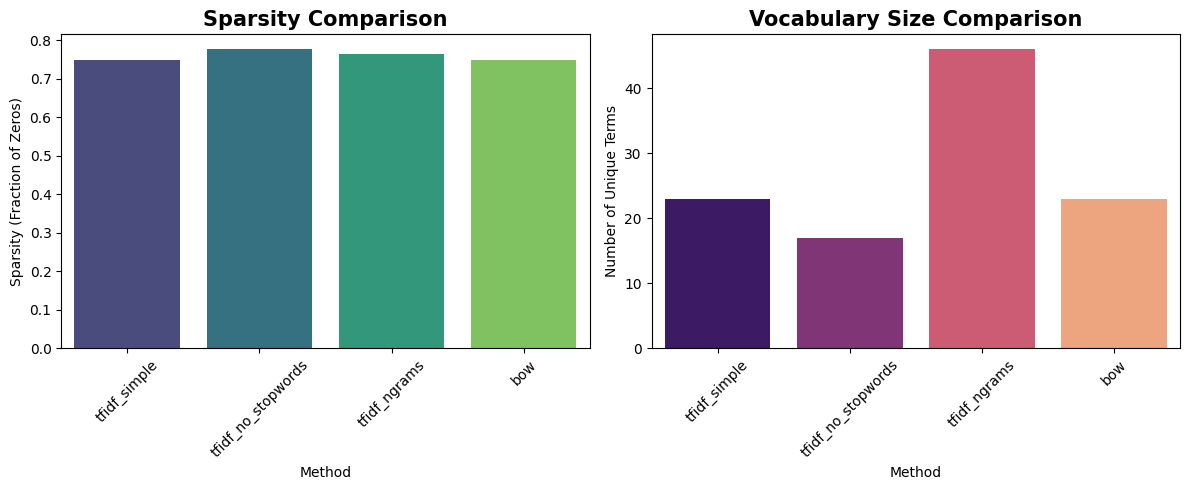

In [6]:
def main():
    """Main function to execute the text representation analysis project."""
    # Step 1: Create a small text corpus
    corpus = [
        "The cat sleeps quietly in the room",
        "The dog runs fast outside",
        "Cats love to sleep all day",
        "Dogs chase cats in the park",
        "The room is quiet and peaceful"
    ]
    logger.info(f"Corpus created with {len(corpus)} documents")
    #Initialize TextRepresentationAnalyzer
    analyzer = TextRepresentationAnalyzer(corpus)
    #Run experiments
    analyzer.run_experiments()
    #Display results
    analyzer.display_results()
    #Compare sparsity and vocabulary size
    analyzer.compare_sparsity_and_vocab_size()
    #Save results
    analyzer.save_results("tfidf_bow_results.csv")

main()